# Car Analysis

This notebook analyzes Fuelio car fuel data from a CSV file.

In [3]:
# Import required libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Loading and Preparation

- Read the Fuelio CSV into the existing DataFrame variable `fuel_data` with header rows/footers skipped.
- Sort entries by “Odo (km)” and convert “Date” to datetime for time-based analysis.
- This prepares the dataset for subsequent visualizations and metrics computed in later cells (odometer vs date and monthly distance metrics).

In [4]:
# Load Fuelio CSV data, skip headers/footers, sort by odometer, convert dates
fuel_data = pd.read_csv("~/Documents/Fuelio_2025-12-05.csv",skiprows=[0,1,2,3],skipfooter=22, engine='python')
fuel_data.sort_values(by="Odo (km)", inplace=True)
fuel_data["Date"] = pd.to_datetime(fuel_data["Date"])
# fuel_data.head(20)

## Data Visualization

Visual analysis of odometer readings over time.

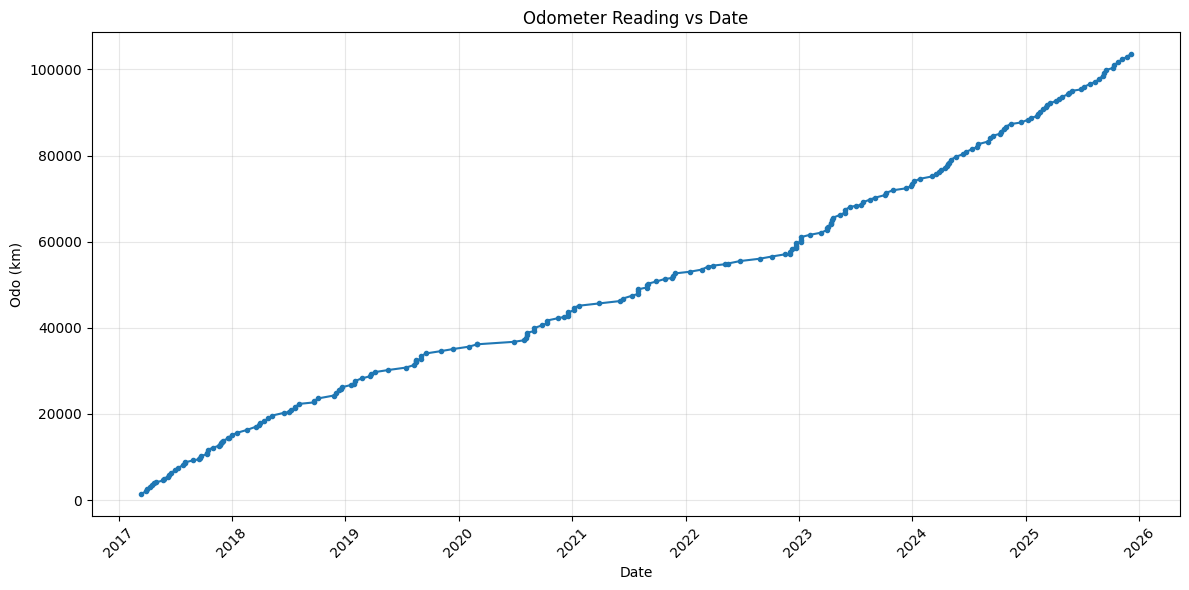

In [5]:
# Plot odometer reading over time to visualize vehicle usage patterns

plt.figure(figsize=(12, 6))
plt.plot(fuel_data["Date"], fuel_data["Odo (km)"], marker='o', linestyle='-', markersize=3)
plt.xlabel("Date")
plt.ylabel("Odo (km)")
plt.title("Odometer Reading vs Date")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Monthly Distance Metrics Calculation

This cell computes monthly distance metrics from `fuel_data`:

- Adds period keys: `Year-Month` (monthly period) and `Year` (yearly period).
- Calculates `km_diff` as the odometer difference between consecutive entries.
- Aggregates monthly kilometers via `groupby('Year-Month')` and applies a 5-month rolling window to derive:
    - `Avgkm/month`: rolling mean
    - `Maxkm/month`: rolling maximum
    - `Minkm/month`: rolling minimum
- Maps these rolling metrics back to each row and returns the updated `fuel_data`.

Notes:
- Assumes `fuel_data` already contains sorted `Date` and `Odo (km)`.
- The 5-month rolling window provides smoother trends for subsequent visualizations.

In [6]:
# Calculate average, minimum, and maximum km/month metrics grouped by month
def calculate_avg_km_per_month(df):
    df = df.copy()

    # Ensure period columns exist
    df['Year-Month'] = df['Date'].dt.to_period('M')
    df['Year'] = df['Date'].dt.to_period('Y')

    # km difference between consecutive entries
    df['km_diff'] = df['Odo (km)'].diff()

    # Sum monthly km, then compute 3-month rolling average
    monthly_km = df.groupby('Year-Month')['km_diff'].sum()
    monthly_avg_m = monthly_km.rolling(window=5, min_periods=5).mean()
    monthly_max_m = monthly_km.rolling(window=5, min_periods=5).max()
    monthly_min_m = monthly_km.rolling(window=5, min_periods=5).min()


    # Map back to each row
    df['Avgkm/month'] = df['Year-Month'].map(monthly_avg_m).astype(float)
    df['Maxkm/month'] = df['Year-Month'].map(monthly_max_m).astype(float)
    df['Minkm/month'] = df['Year-Month'].map(monthly_min_m).astype(float)

    return df

fuel_data = calculate_avg_km_per_month(fuel_data)
# fuel_data.head(20)

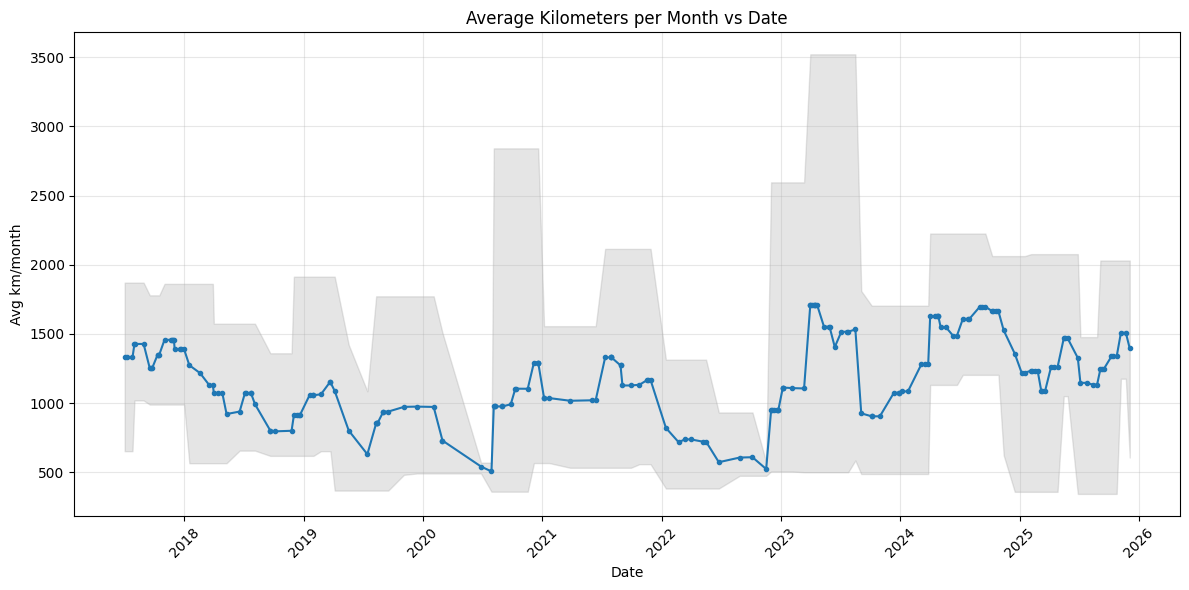

In [7]:
# Plot average km/month with shaded min/max range to show monthly distance variation
plt.figure(figsize=(12, 6))
plt.plot(fuel_data["Date"], fuel_data["Avgkm/month"],
         marker='o', linestyle='-', markersize=3)
plt.fill_between(fuel_data["Date"],
                 fuel_data["Minkm/month"],
                 fuel_data["Maxkm/month"],
                 color='gray', alpha=0.2,
                 label='Min-Max Range')
plt.xlabel("Date")
plt.ylabel("Avg km/month")
plt.title("Average Kilometers per Month vs Date")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Create histogram showing distribution of monthly distances traveled
import matplotlib.pyplot as plt

# Ensure Year column exists
fuel_data["Year"] = fuel_data["Date"].dt.year

# Prepare data grouped by year
groups = [g["Avg km/month"].values for y, g in fuel_data.groupby("Year")]
labels = [str(y) for y, g in fuel_data.groupby("Year")]

plt.figure(figsize=(10, 6))

plt.hist(
    groups,
    bins=20,
    stacked=True,     # <-- THIS makes the histogram stacked
    label=labels,
    alpha=0.8
)

plt.xlabel("Avg km/month")
plt.ylabel("Count (stacked)")
plt.title("Stacked distribution of Avg km/month by Year")
plt.legend(title="Year")
plt.tight_layout()
plt.show()

KeyError: 'Avg km/month'

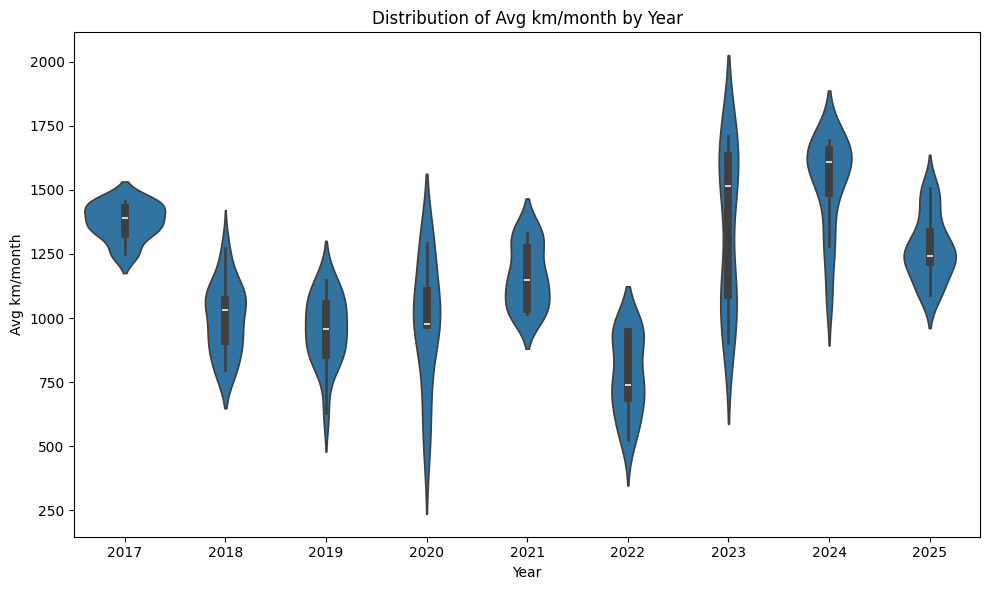

In [25]:
# Generate heatmap visualization of average km/month by year and month
import seaborn as sns
import matplotlib.pyplot as plt

fuel_data["Year"] = fuel_data["Date"].dt.year

plt.figure(figsize=(10, 6))
sns.violinplot(
    data=fuel_data,
    x="Year",
    y="Avg km/month"
)

plt.title("Distribution of Avg km/month by Year")
plt.xlabel("Year")
plt.ylabel("Avg km/month")
plt.tight_layout()
plt.show()

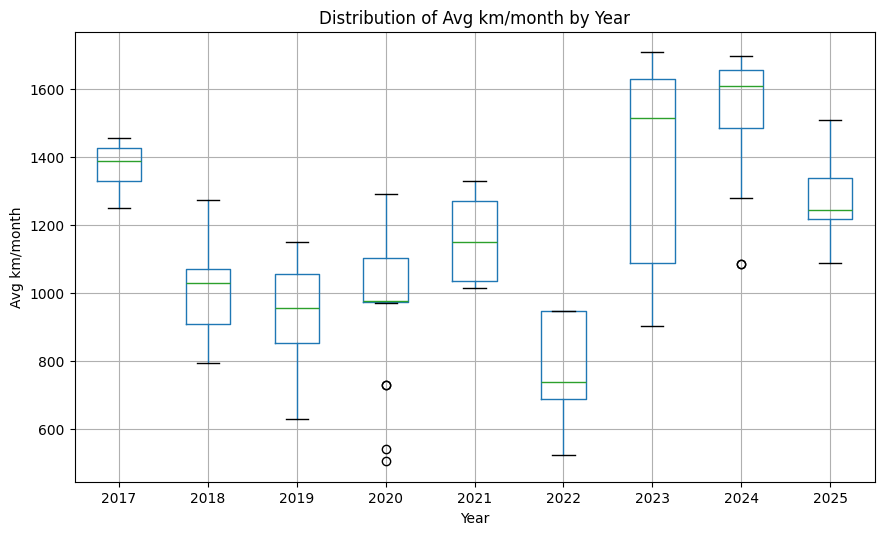

In [27]:
# Create boxplot showing distribution of average km/month by year
# fuel_data["Year"] = fuel_data["Date"].dt.year
fuel_data.boxplot(column="Avgkm/month", by="Year", figsize=(10, 6))
plt.title("Distribution of Avg km/month by Year")
plt.suptitle("")
plt.xlabel("Year")
plt.ylabel("Avg km/month")
plt.show()

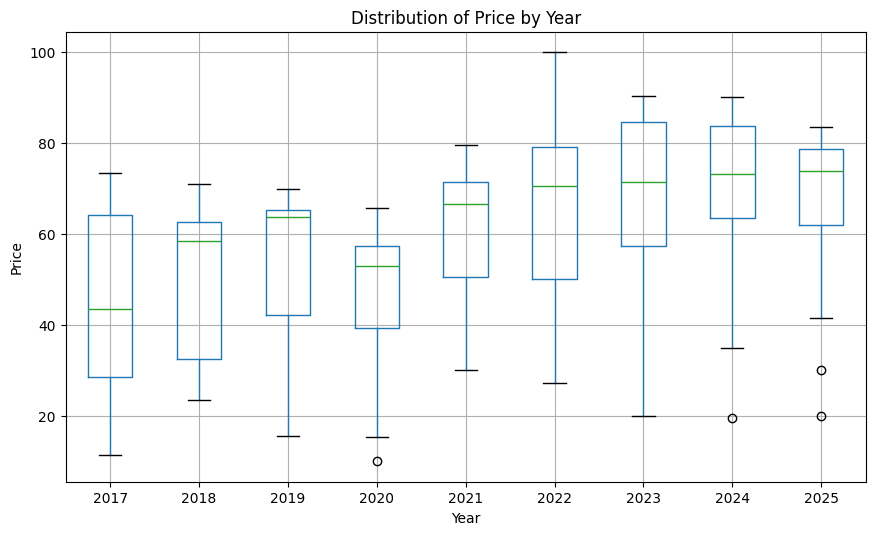

In [52]:
# Create boxplot showing fuel price distribution by year
# fuel_data["Year"] = fuel_data["Date"].dt.year
fuel_data.boxplot(column="Price", by="Year", figsize=(10, 6))
plt.title("Distribution of Price by Year")
plt.suptitle("")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()